In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB 
from sklearn.preprocessing import OneHotEncoder
import operator

Task 1

In [17]:
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
             'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
             'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
             'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring',
             'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
             'population', 'habitat']
dset = pd.read_csv('agaricus-lepiota.data', names=['class'] + features)
data_x = dset[features]
data_y = dset['class']

object_count = data_x.shape[0]
features_count = data_x.shape[1]

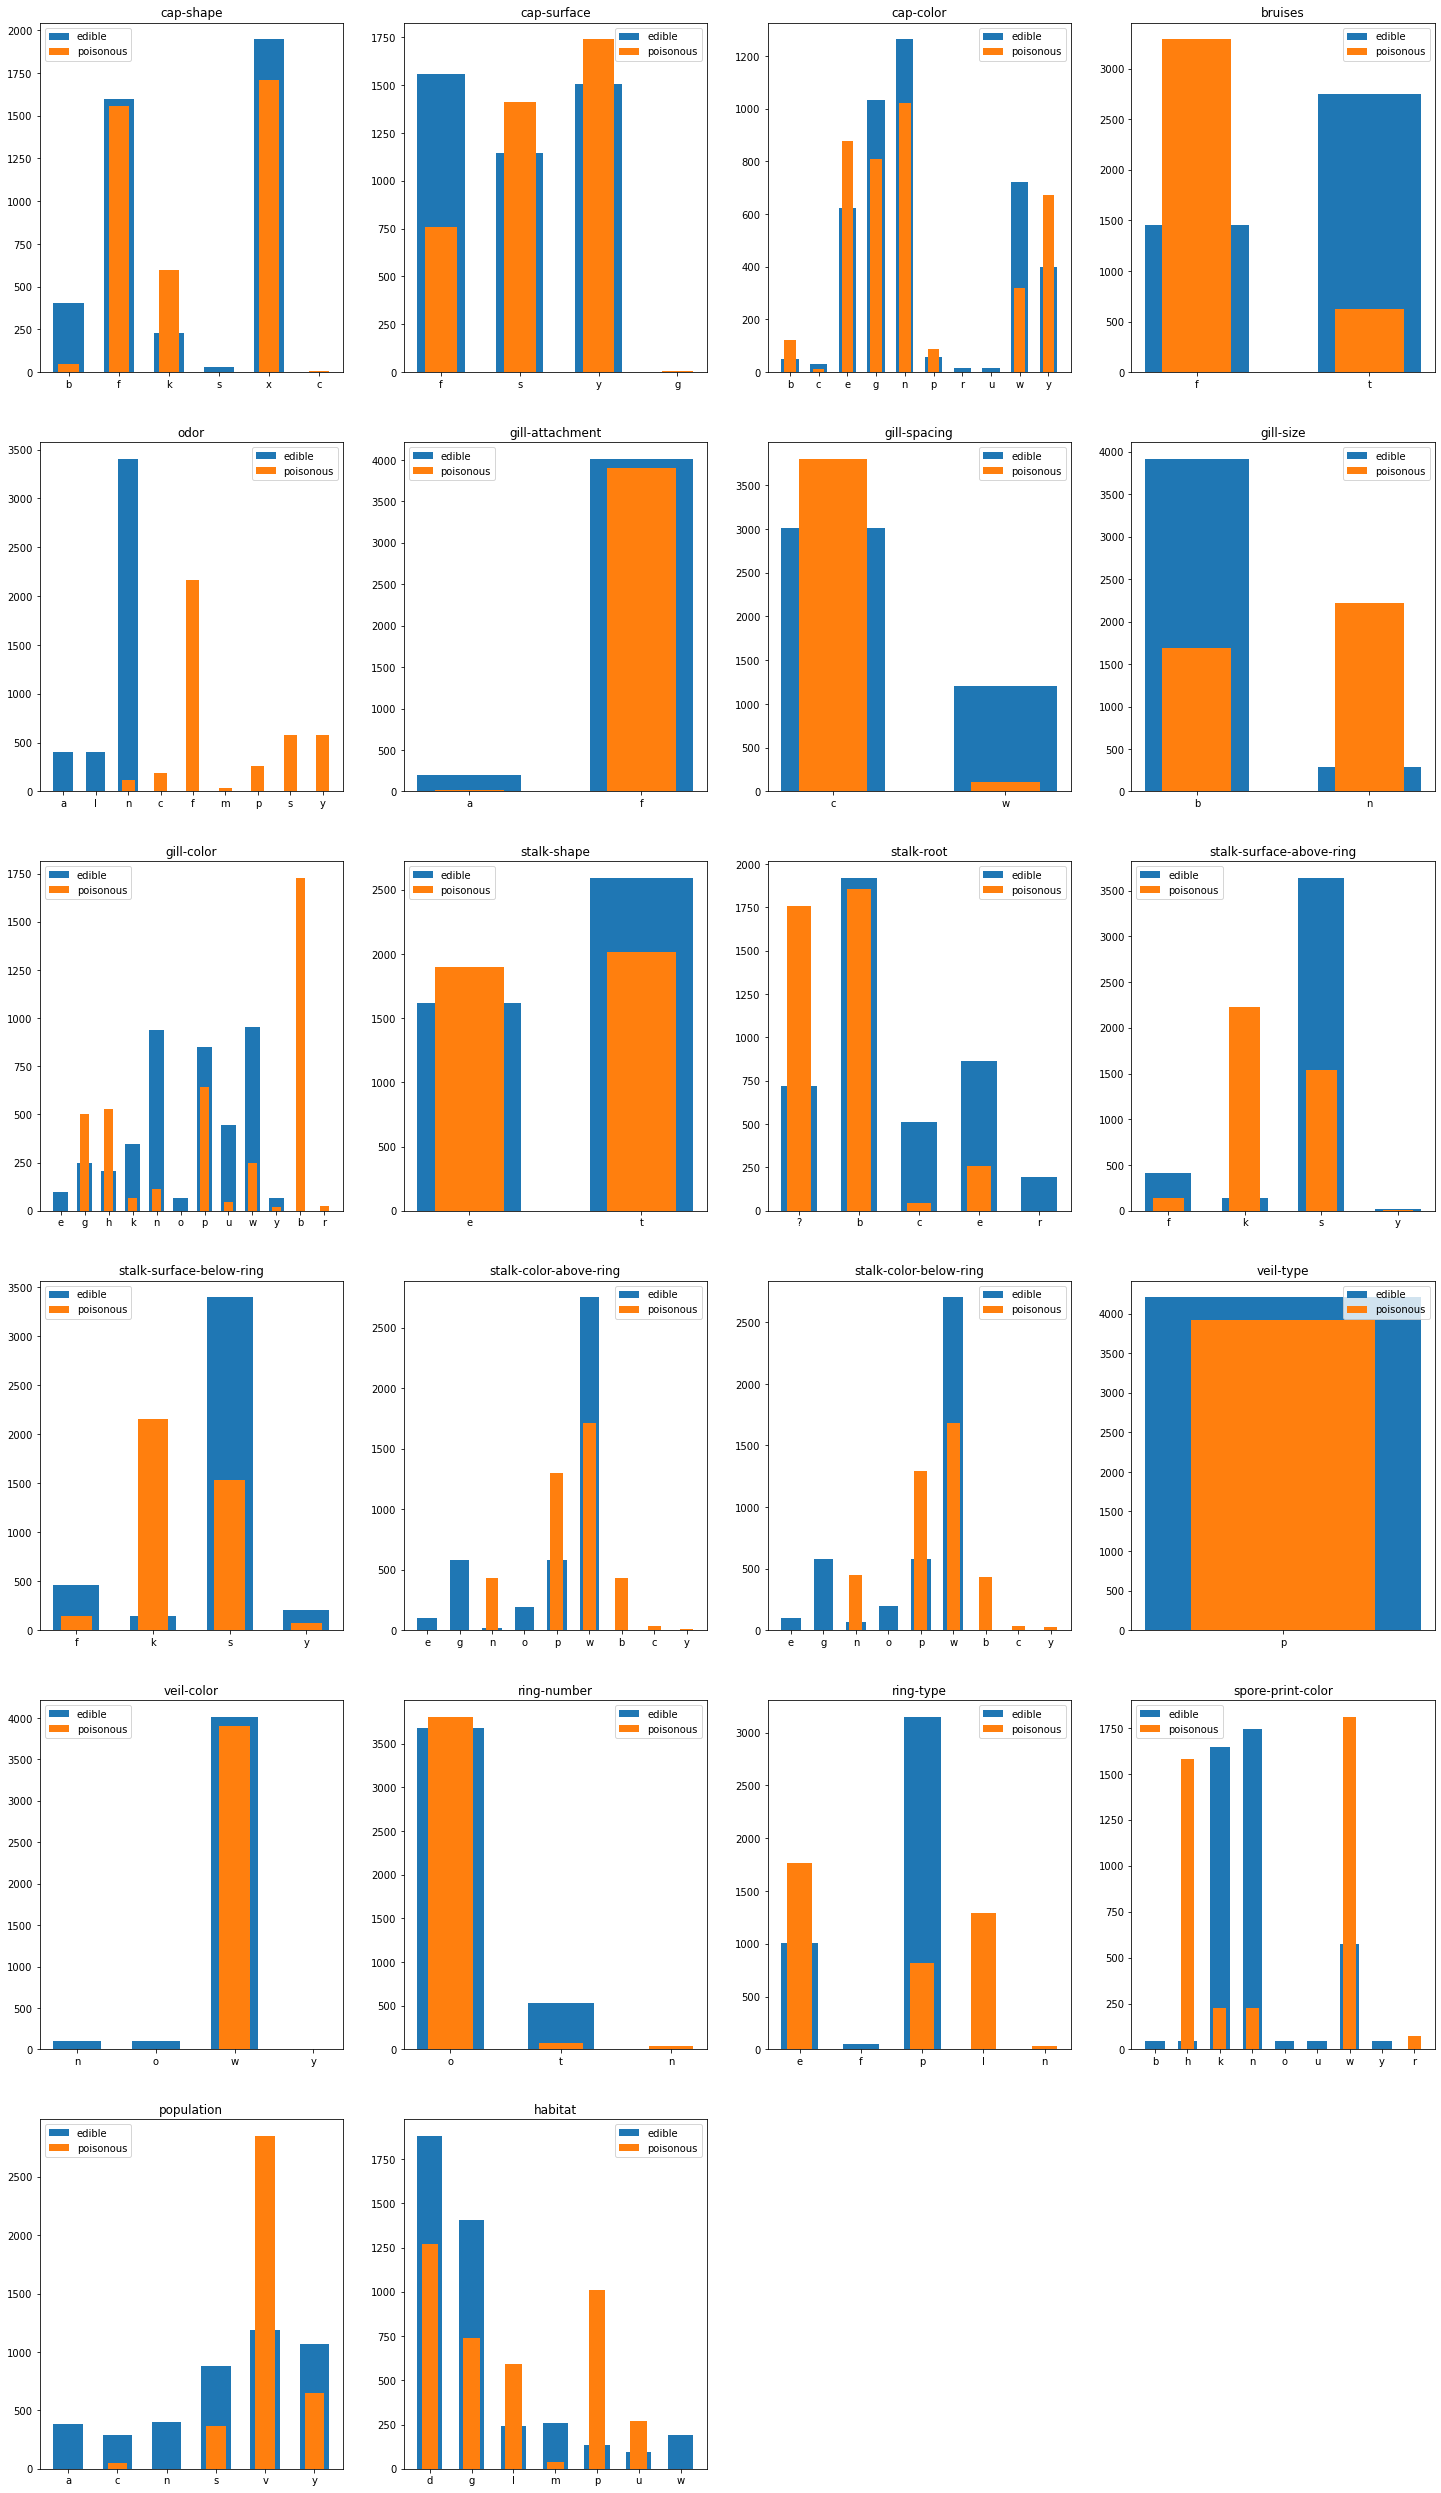

In [27]:
fig, axs = plt.subplots(6, 4, figsize=(25,45))

for i in range(6):
    for j in range(4):
        if i*4 + j >= features_count:
            axs[i, j].axis('off')
            continue
        

        feature = features[i*4+j]         
        edible_feature_values, edible_feature_values_counts = \
            np.unique(data_x[data_y == 'e'][feature], return_counts=True)
        poisonous_feature_values, poisonous_feature_values_counts = \
            np.unique(data_x[data_y == 'p'][feature], return_counts=True)
       

        axs[i, j].bar(edible_feature_values, edible_feature_values_counts, width=0.6, label='edible')
        axs[i, j].bar(poisonous_feature_values, poisonous_feature_values_counts, width=0.4, label='poisonous')
        axs[i, j].set_title(feature)
        axs[i, j].legend()
        edible_distributions = dict(zip(edible_feature_values, edible_feature_values_counts/object_count))
        poisonous_distributions = dict(zip(edible_feature_values, poisonous_feature_values_counts/object_count))

Task 3

In [28]:
model = BernoulliNB()
model.fit(data_x_train, data_y_train)

sk_nb_y_pred_train = model.predict(data_x_train)
sk_nb_y_pred_test = model.predict(data_x_test)

print('sk.CategoricalNB accuracy[train]:', 
      len(sk_nb_y_pred_train[sk_nb_y_pred_train == data_y_train])/len(data_y_train))
print('sk.CategoricalNB accuracy[test]:', 
      len(sk_nb_y_pred_test[sk_nb_y_pred_test == data_y_test])/len(data_y_test))

sk.CategoricalNB accuracy[train]: 0.9380935631375308
sk.CategoricalNB accuracy[test]: 0.9474979491386383


Task 2

In [31]:
encoder = OneHotEncoder().fit(data_x)

data_x_onehot = encoder.transform(data_x).toarray()
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x_onehot, data_y, test_size=0.3)

In [32]:
class FreqDiscriminator:
    def fit(self, x, y):
        y_classes, y_probs = list(np.unique(y, return_counts=True))
        y_probs = y_probs / y.shape[0] 
        self.y_probs = dict(zip(y_classes, y_probs))
        self.x_probs_by_y = {}
        for y_class in y_classes:
            x_by_y = x[y == y_class]
            self.x_probs_by_y[y_class] = sum(x_by_y)/x_by_y.shape[0]
        
    def pred(self, val):
        probs = {}
        for y in self.x_probs_by_y.keys():
            probs[y] = self.y_probs[y] * sum(self.x_probs_by_y[y]*val)
        return max(probs.items(), key=operator.itemgetter(1))[0]
        
    def predict(self, x):
        return np.asarray([self.pred(val) for val in x])

feature_start_index = 0
for i in range(len(features)):
    fd = FreqDiscriminator()
    category = encoder.categories_[i]
    feature_range = range(feature_start_index, feature_start_index+len(category))
    fd.fit(data_x_train[:, feature_range], data_y_train)
    y_pred_train = fd.predict(data_x_train[:, feature_range])
    y_pred_test = fd.predict(data_x_test[:, feature_range])
    print(f'fd accuracy [train, {features[i]}]:', 
          len(y_pred_train[y_pred_train == data_y_train])/len(data_y_train))
    print(f'fd accuracy [test, {features[i]}]:', 
          len(y_pred_test[y_pred_test == data_y_test])/len(data_y_test))
    feature_start_index += len(category)

fd accuracy [train, cap-shape]: 0.5597959901512487
fd accuracy [test, cap-shape]: 0.5746513535684987
fd accuracy [train, cap-surface]: 0.5826591628561378
fd accuracy [test, cap-surface]: 0.5754716981132075
fd accuracy [train, cap-color]: 0.5944424903271193
fd accuracy [test, cap-color]: 0.5972108285479901
fd accuracy [train, bruises]: 0.7423496306718256
fd accuracy [test, bruises]: 0.7477440525020509
fd accuracy [train, odor]: 0.9841716496658459
fd accuracy [test, odor]: 0.9876948318293683
fd accuracy [train, gill-attachment]: 0.5149489975378122
fd accuracy [test, gill-attachment]: 0.5250205086136177
fd accuracy [train, gill-spacing]: 0.6199437214210342
fd accuracy [test, gill-spacing]: 0.6066447908121411
fd accuracy [train, gill-size]: 0.7550123109391488
fd accuracy [test, gill-size]: 0.7592288761279737
fd accuracy [train, gill-color]: 0.8063665142455153
fd accuracy [test, gill-color]: 0.8018867924528302
fd accuracy [train, stalk-shape]: 0.5539922616953922
fd accuracy [test, stalk-sha

Odor is the BEST!!!

4. Самостоятельно реализовать метод, не используя готовый. Сравнить полученное решение с библиотечным. Добавить регуляризатор в оценки частот.

In [7]:
class NaiveBayes:
    def fit(self, x, y):
        probs = {}
        y_classes = list(np.unique(y))
        for y_class in y_classes:
            x_by_y = x[y == y_class]
            x_probs_by_y = []
            for pos in range(x.shape[1]):
                x_by_y_pos = x_by_y[:,pos]
                one_prob = (x_by_y_pos.sum()+1) / (x_by_y_pos.shape[0]+2) 
                zero_prob = 1 - one_prob
                x_probs_by_y.append((zero_prob, one_prob))
            probs[y_class] = x_probs_by_y
        self.probs = probs
    
    def pred(self, row):
        probs = {}
        for y in self.probs.keys():
            prob = 1
            for pos in range(len(row)):
                prob *= self.probs[y][pos][int(row[pos])]
            probs[y] = prob
        return max(probs.items(), key=operator.itemgetter(1))[0]
    
    def predict(self, x):
        return np.apply_along_axis(self.pred, 1, x)
    
nb = NaiveBayes()
nb.fit(data_x_train, data_y_train)

nb_y_pred_train = nb.predict(data_x_train)
nb_y_pred_test = nb.predict(data_x_test)

print('my NB accuracy [train]:', 
      len(nb_y_pred_train[nb_y_pred_train == data_y_train])/len(data_y_train))
print('my NB accuracy [test]:', 
      len(nb_y_pred_test[nb_y_pred_test == data_y_test])/len(data_y_test))

my NB accuracy [train]: 0.9387970453746043
my NB accuracy [test]: 0.9392945036915504
